In [1]:
from data_lib.data_lib import *

In [2]:
gests = read_data('data_full.csv')

In [3]:
#gests = add_noise(gests,0.001,100)

In [4]:
X, y1 = array_from_dict(gests, ndots=20, gyro=False)

In [5]:
X = np.array([x[0] for x in X])

In [6]:
for ind in xrange(len(X)):
    x = X[ind][:,0]
    X[ind][:,0] = (x-min(x))/(max(x)-min(x))
    y = X[ind][:,1]
    X[ind][:,1] = (y-min(y))/(max(y)-min(y))
    z = X[ind][:,2]
    X[ind][:,2] = (z-min(z))/(max(z)-min(z))

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from keras.layers import Input, LSTM, Dropout, Dense, RepeatVector, Flatten, Reshape
from keras.layers.merge import Add, Concatenate
from keras.models import Model

input_len, input_dim, latent_dim = 20, 3, 6


# this is our input placeholder
input_img = Input(shape=(input_len,input_dim))
# "encoded" is the encoded representation of the input
flattened = Flatten()(input_img)
encoded = Dense(latent_dim, activation='sigmoid')(flattened)
decoded1 = Dense(input_len*input_dim, activation='sigmoid')(encoded)
decoded2 = Dropout(0.1)(decoded1)
decoded3 = Reshape((input_len, input_dim))(decoded1)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(input_dim, activation='sigmoid')(decoded3)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

Wsaveautoencoder = autoencoder.get_weights()
Wsaveencoder = encoder.get_weights()
#decoder = Model(encoded, decoded)


Using TensorFlow backend.


In [9]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

block 1
42


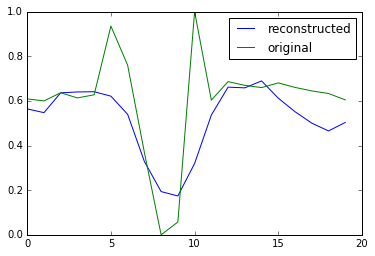

68


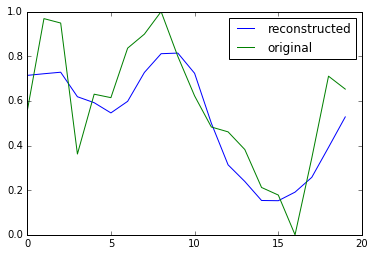

62


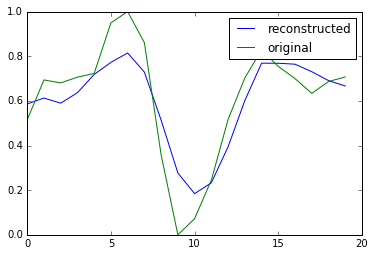

block 2
34


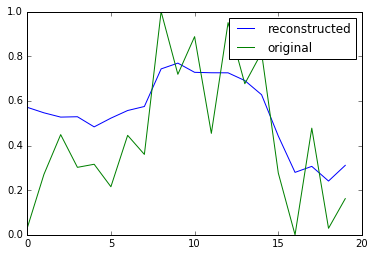

26


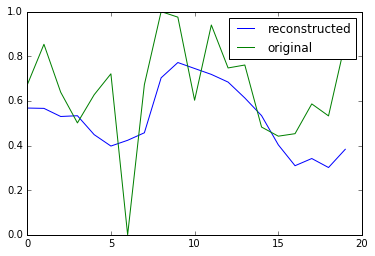

78


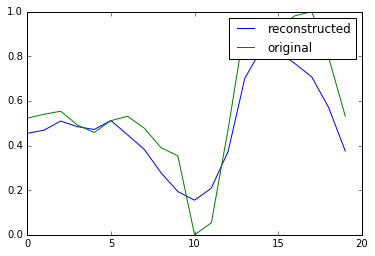

block 3
29


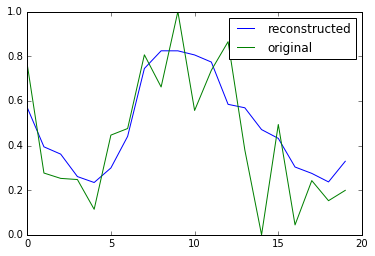

37


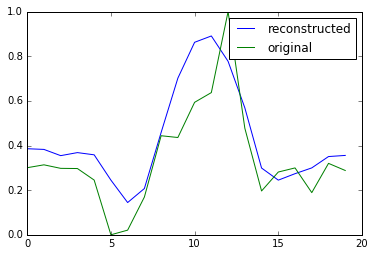

2


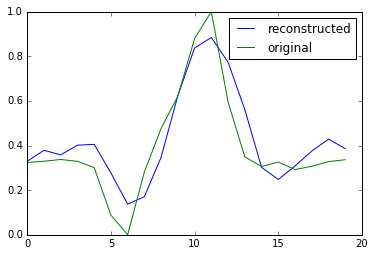

block 4
52


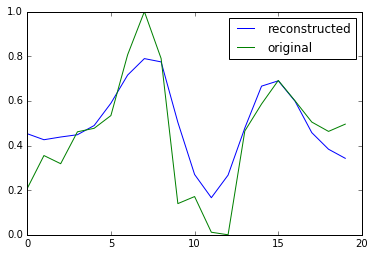

20


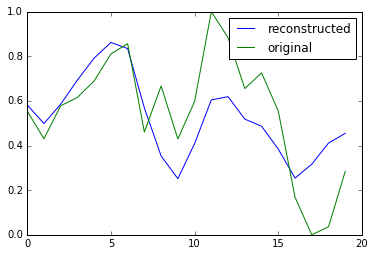

28


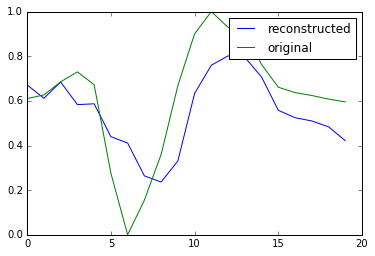

block 5
69


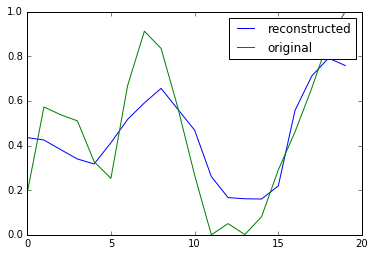

10


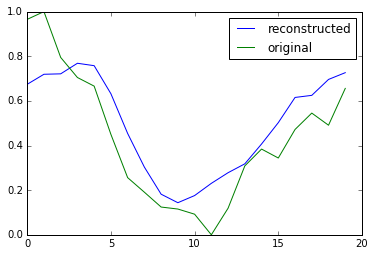

19


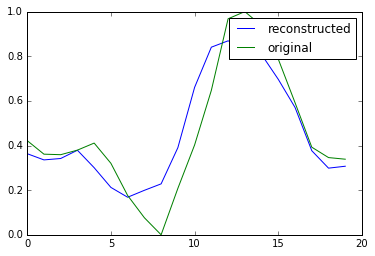

block 6
74


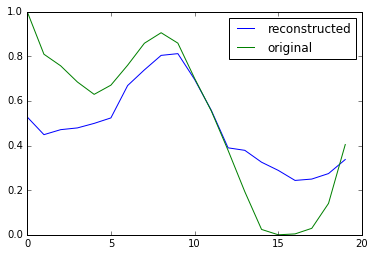

16


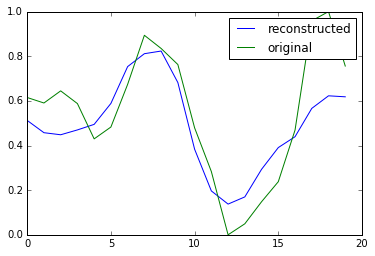

15


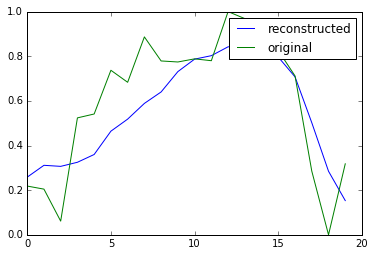

block 7
27


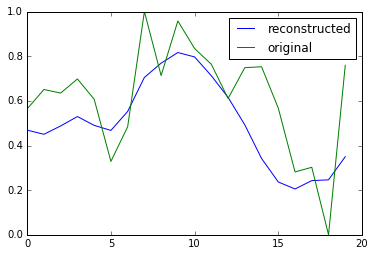

3


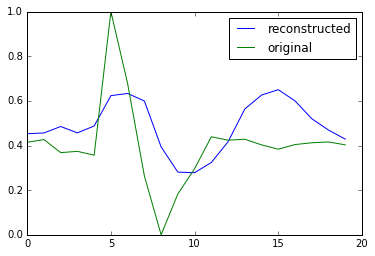

18


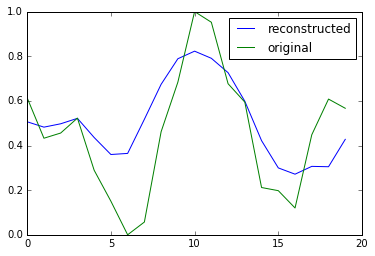

block 8
49


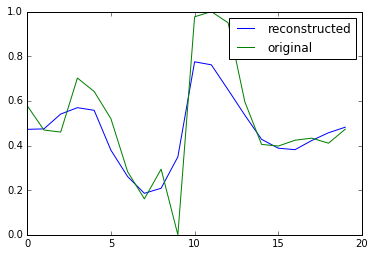

53


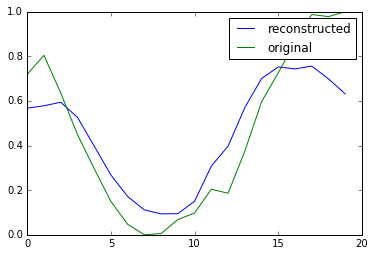

16


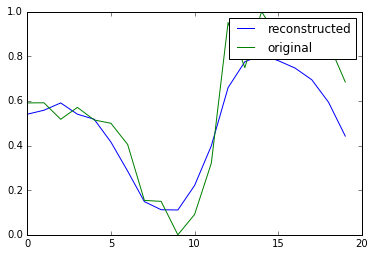

block 9
91


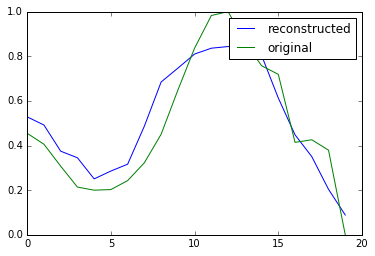

56


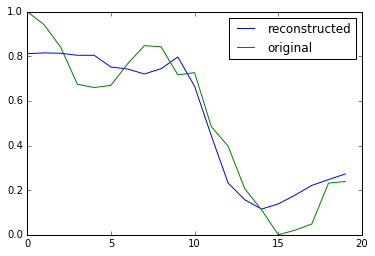

73


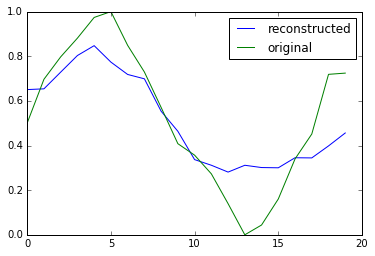

block 10
50


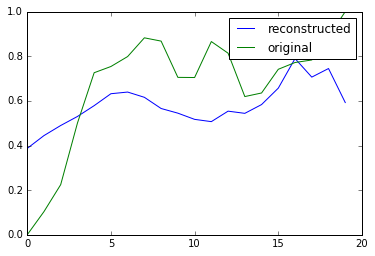

62


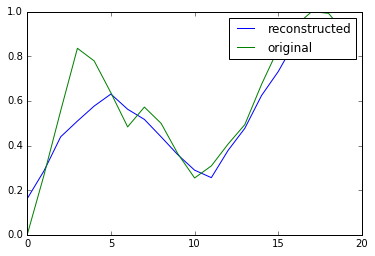

5


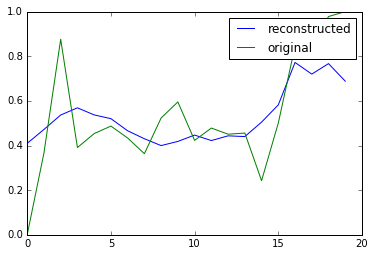

block 11
54


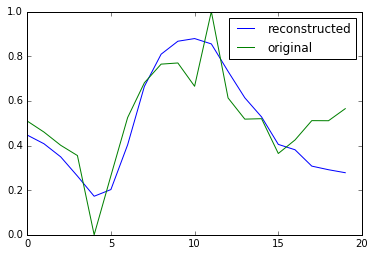

56


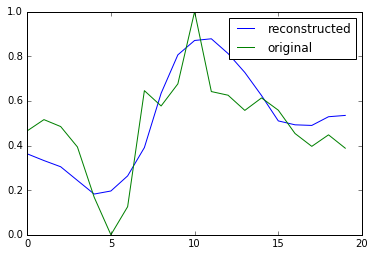

71


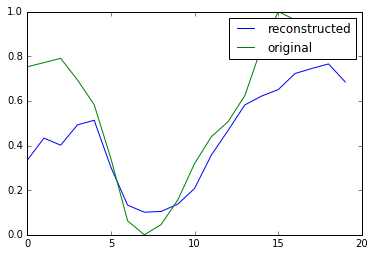

block 12
71


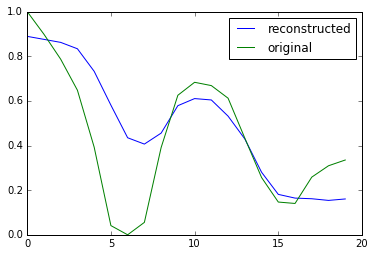

56


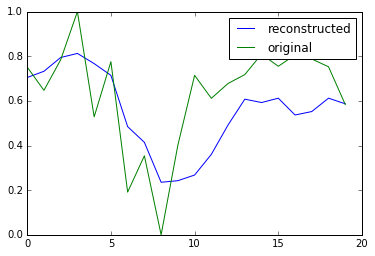

94


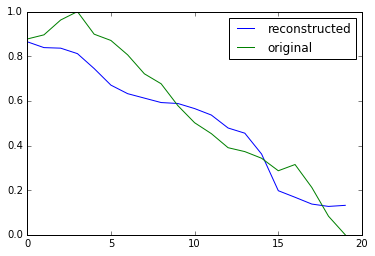

block 13
27


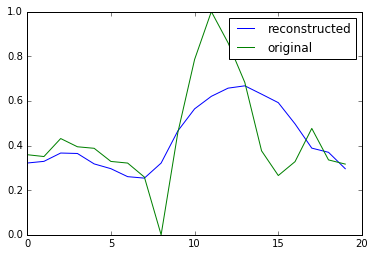

26


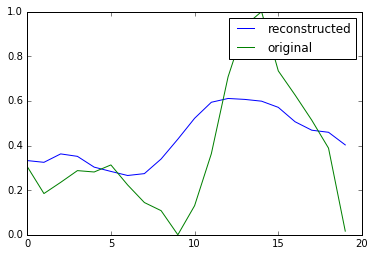

43


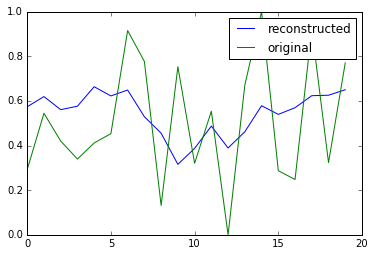

block 14
27


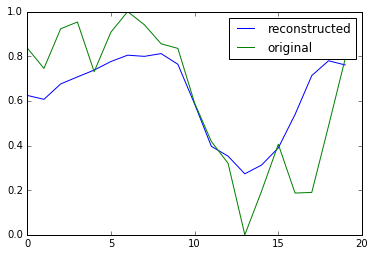

38


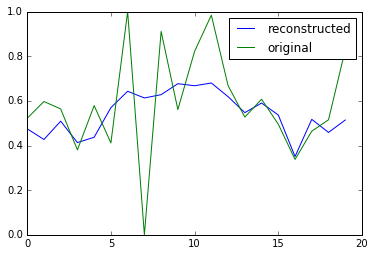

51


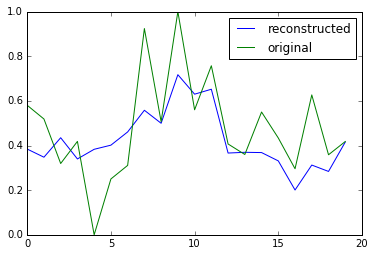

block 15
63


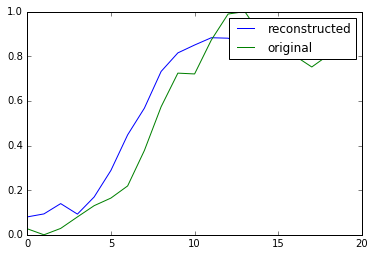

59


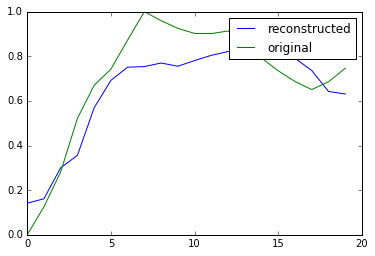

11


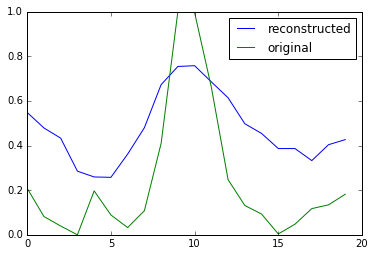

block 16
63


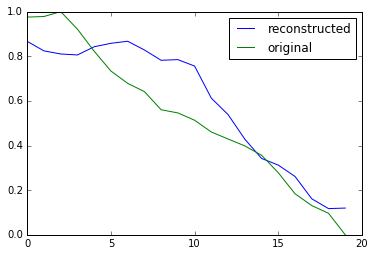

18


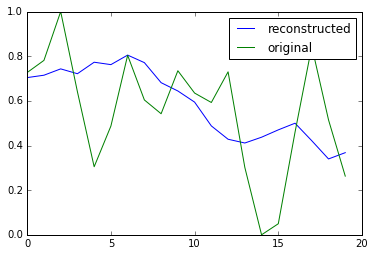

60


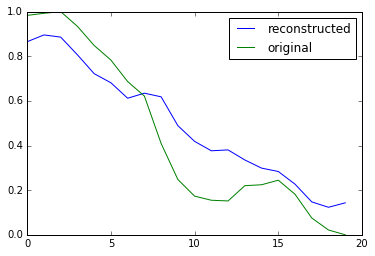

In [10]:
weights = []
for block in range(1,17):
    print 'block', block
    autoencoder.set_weights(Wsaveautoencoder)
    encoder.set_weights(Wsaveencoder)
    autoencoder.fit(X[np.where(y1==block)], X[np.where(y1==block)], 
                    epochs=500,batch_size=10,shuffle=True, validation_split=0.1, verbose=0)
    
    #plt.imshow([autoencoder.layers[2].get_weights()[1]], interpolation="nearest", cmap='gray')
    weights.append(autoencoder.layers[2].get_weights()[1])
    #plt.show()
    for _ in range(3):
        k = int(len(X[np.where(y1==block)])*np.random.random_sample())
        print k
        plt.plot([p[0] for p in autoencoder.predict(X[np.where(y1==block)])[k]])
        plt.plot([p[0] for p in X[np.where(y1==block)][k]])
        plt.legend(('reconstructed', 'original'))
        plt.show()

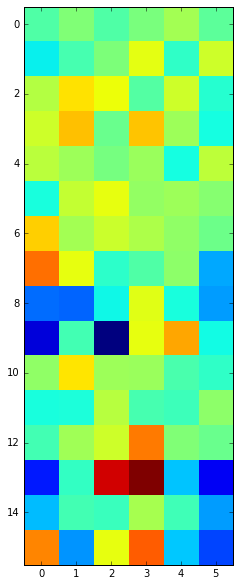

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(weights, interpolation="nearest")
plt.show()

In [12]:
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 20, 3)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 366       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                420       
_________________________________________________________________
reshape_1 (Reshape)          (None, 20, 3)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 20, 3)             12        
Total params: 798.0
Trainable params: 798.0
Non-trainable params: 0.0
_________________________________________________________________
None
